In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('new_churn_data.csv')

In [3]:
df.head()

,user,churn,age,housing,deposits,withdrawal,purchases_partners,purchases,cc_taken,cc_recommended,...,payment_type,waiting_4_loan,cancelled_loan,received_loan,rejected_loan,zodiac_sign,left_for_two_month_plus,left_for_one_month,reward_rate,is_referred
0,55409,0,37.0,na,0,0,0,0,0,0,...,Bi-Weekly,0,0,0,0,Leo,1,0,0.00,0
1,23547,0,28.0,R,0,0,1,0,0,96,...,Weekly,0,0,0,0,Leo,0,0,1.47,1
2,58313,0,35.0,R,47,2,86,47,0,285,...,Semi-Monthly,0,0,0,0,Capricorn,1,0,2.17,0
3,8095,0,26.0,R,26,3,38,25,0,74,...,Bi-Weekly,0,0,0,0,Capricorn,0,0,1.10,1
4,61353,1,27.0,na,0,0,2,0,0,0,...,Bi-Weekly,0,0,0,0,Aries,1,0,0.03,0


In [4]:
df.describe()

,user,churn,age,deposits,withdrawal,purchases_partners,purchases,cc_taken,cc_recommended,cc_disliked,...,android_user,registered_phones,waiting_4_loan,cancelled_loan,received_loan,rejected_loan,left_for_two_month_plus,left_for_one_month,reward_rate,is_referred
count,26996.000000,26996.000000,26996.000000,26996.000000,26996.000000,26996.000000,26996.000000,26996.000000,26996.000000,26996.000000,...,26996.000000,26996.000000,26996.000000,26996.000000,26996.000000,26996.000000,26996.00000,26996.000000,26996.000000,26996.000000
mean,35418.535302,0.413913,32.219921,3.342051,0.307045,28.066677,3.273967,0.073789,92.639502,0.050637,...,0.587235,0.420988,0.001296,0.018818,0.018188,0.004890,0.17347,0.018077,0.907819,0.318010
std,20319.620354,0.492542,9.964838,9.131992,1.055488,42.221432,8.953651,0.437331,88.868773,0.871431,...,0.492340,0.912884,0.035984,0.135883,0.133633,0.069756,0.37866,0.133232,0.751991,0.465712
min,1.000000,0.000000,17.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
25%,17808.750000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,10.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.200000,0.000000
50%,35745.500000,0.000000,30.000000,0.000000,0.000000,9.000000,0.000000,0.000000,65.000000,0.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.780000,0.000000
75%,53236.750000,1.000000,37.000000,1.000000,0.000000,43.000000,1.000000,0.000000,164.000000,0.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,1.530000,1.000000
max,69658.000000,1.000000,91.000000,65.000000,29.000000,1067.000000,63.000000,29.000000,522.000000,65.000000,...,1.000000,5.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,4.000000,1.000000


In [5]:
df.isna().any()

user                       False
churn                      False
age                        False
housing                    False
deposits                   False
withdrawal                 False
purchases_partners         False
purchases                  False
cc_taken                   False
cc_recommended             False
cc_disliked                False
cc_liked                   False
cc_application_begin       False
app_downloaded             False
web_user                   False
ios_user                   False
android_user               False
registered_phones          False
payment_type               False
waiting_4_loan             False
cancelled_loan             False
received_loan              False
rejected_loan              False
zodiac_sign                False
left_for_two_month_plus    False
left_for_one_month         False
reward_rate                False
is_referred                False
dtype: bool

In [6]:
df.isna().sum()

user                       0
churn                      0
age                        0
housing                    0
deposits                   0
withdrawal                 0
purchases_partners         0
purchases                  0
cc_taken                   0
cc_recommended             0
cc_disliked                0
cc_liked                   0
cc_application_begin       0
app_downloaded             0
web_user                   0
ios_user                   0
android_user               0
registered_phones          0
payment_type               0
waiting_4_loan             0
cancelled_loan             0
received_loan              0
rejected_loan              0
zodiac_sign                0
left_for_two_month_plus    0
left_for_one_month         0
reward_rate                0
is_referred                0
dtype: int64

In [7]:
X=df.loc[:,['waiting_4_loan','cancelled_loan','received_loan','rejected_loan']]

In [8]:
Y = df.loc[:,['is_referred']].values

In [9]:
X

,waiting_4_loan,cancelled_loan,received_loan,rejected_loan
0,0,0,0,0
1,0,0,0,0
2,0,0,0,0
3,0,0,0,0
4,0,0,0,0
...,...,...,...,...
26991,0,0,0,0
26992,0,0,0,1
26993,0,0,0,0
26994,0,0,0,0


In [10]:
Y.shape

(26996, 1)

In [11]:
from sklearn.preprocessing import StandardScaler

In [12]:
sc=StandardScaler()

In [13]:
x = sc.fit_transform(X)

In [14]:
x

array([[-0.03603015, -0.13848645, -0.13610587, -0.07009735],
       [-0.03603015, -0.13848645, -0.13610587, -0.07009735],
       [-0.03603015, -0.13848645, -0.13610587, -0.07009735],
       ...,
       [-0.03603015, -0.13848645, -0.13610587, -0.07009735],
       [-0.03603015, -0.13848645, -0.13610587, -0.07009735],
       [-0.03603015, -0.13848645, -0.13610587, -0.07009735]])

In [15]:
Y = Y.reshape(-1)

In [16]:
from sklearn.model_selection import train_test_split

In [17]:
X_tr,X_ts,Y_tr,Y_ts=train_test_split(x,Y, random_state=10,test_size=0.2)

In [18]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [19]:
acc_value=[]
err_value=[]

In [20]:
for k in range(1,30):
    model = KNeighborsClassifier(n_neighbors =k)
    model.fit(X_tr,Y_tr)
    Y_prediction = model.predict(X_ts)
    accuracy=accuracy_score(Y_ts,Y_prediction)
    acc_value.append(accuracy)
    err_value.append(1-accuracy)

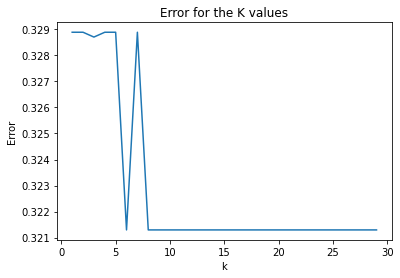

In [21]:
plt.plot(range(1,30),err_value)
plt.title('Error for the K values')
plt.xlabel('k')
plt.ylabel('Error')
plt.show()

In [26]:
model1 = KNeighborsClassifier(n_neighbors=9)
model1.fit(X_tr,Y_tr)
Y_prediction1 = model1.predict(X_ts)

In [27]:
from sklearn.metrics import confusion_matrix

In [28]:
confusion_matrix(Y_ts,Y_prediction1)

array([[3665,    0],
       [1735,    0]], dtype=int64)

In [25]:
accuracy_score(Y_ts,Y_prediction1)

0.6711111111111111